In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import phik

In [7]:
df = pd.read_csv("data/Algerian_forest_fires.csv",header=1,encoding="utf-8")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## EDA

In [57]:
df[df["Classes"]==1]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
5,6.0,6.0,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1.0
6,7.0,6.0,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1.0
7,8.0,6.0,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1.0
10,11.0,6.0,31.0,65.0,14.0,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1.0
11,12.0,6.0,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,19.0,9.0,29.0,41.0,8.0,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1.0
236,21.0,9.0,35.0,34.0,17.0,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1.0
237,22.0,9.0,33.0,64.0,13.0,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1.0
238,23.0,9.0,35.0,56.0,14.0,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [9]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [10]:
df["month"].unique()

array(['06', '07', '08', '09', nan, 'month'], dtype=object)

In [11]:
df["year"].unique()

array(['2012', nan, 'year'], dtype=object)

In [12]:
df["day"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [13]:
df[df["year"]=="year"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [14]:
df[df["day"]=='Sidi-Bel Abbes Region Dataset']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


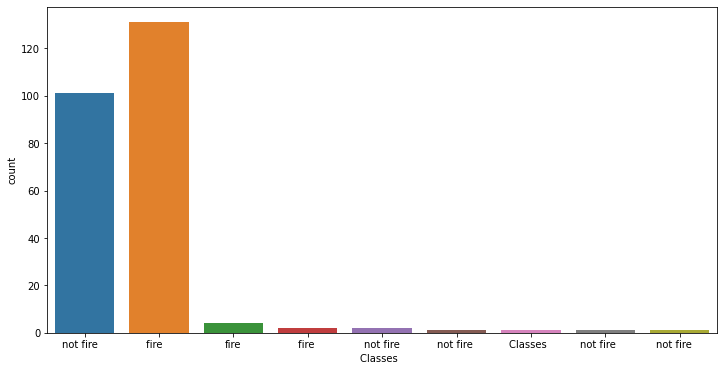

In [15]:
# check the output column
plt.subplots(figsize=(12,6))
sns.countplot(df["Classes  "])

In [16]:
df["Classes  "].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [17]:
df[df["Classes  "].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


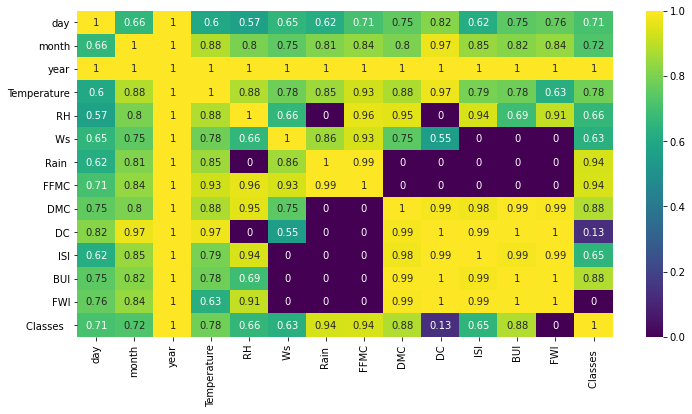

In [18]:
# let's check the correlation 
plt.subplots(figsize=(12,6))
sns.heatmap(df.phik_matrix(), annot=True, cmap='viridis')

### Observation

1. Index 122 and 123 is just a column names we have to drop those rows.
2. Output column have mistypo's like some have more whitespaces and some don't. So, we all have to handle this thing.
3. Row no. 167 have some wrong values so also drop that raw.
4. Year column has only one value we can it is a constant feature we'll drop this column
5. All the features are categorical feature, we'll change the type of those columns.
6. Some Features are highly correlated together, so we'll drop all those columns which are highly correlated.

## Feature Engineering

In [19]:
# Droping index 122,123
df.drop(index=[122,123],inplace=True)

In [20]:
# Correcting mistypo's in output columns

cla = {'not fire   ': 'not fire', 'not fire':'not fire', 'not fire':'not fire',
           'not fire     ': 'not fire', 
           'not fire    ': 'not fire',
           'fire   ': 'fire',
           'fire':'fire',
           'fire ':'fire'}

df["Classes"] = df["Classes  "].map(cla)

In [21]:
# droping one classes column
df.drop("Classes  ",axis=1,inplace=True)

In [22]:
# Droping index row 167
df.drop(index=167,inplace=True)

In [23]:
# Drop constant feature
df.drop("year",axis=1,inplace=True)

In [24]:
# rename the columns name where we have whitespaces in column name
df.rename(columns = {' RH':'RH', ' Ws':'Ws', "Rain ":"Rain"}, inplace = True)

In [25]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [28]:
# Handling categorical feature, changing type of the columns
for feat in df.columns:
    if feat not in "Classes":
        df[feat] = df[feat].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   Temperature  243 non-null    float64
 3   RH           243 non-null    float64
 4   Ws           243 non-null    float64
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      242 non-null    object 
dtypes: float64(12), object(1)
memory usage: 26.6+ KB


In [30]:
# handling output column
df["Classes"] = df["Classes"].map({"not fire":0,"fire":1})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   Temperature  243 non-null    float64
 3   RH           243 non-null    float64
 4   Ws           243 non-null    float64
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      242 non-null    float64
dtypes: float64(13)
memory usage: 26.6 KB


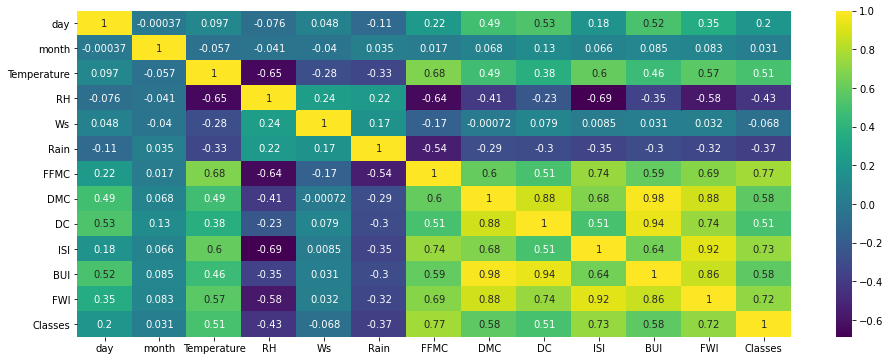

In [32]:
# let's check the correlation using pearson correlation
plt.subplots(figsize=(16,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

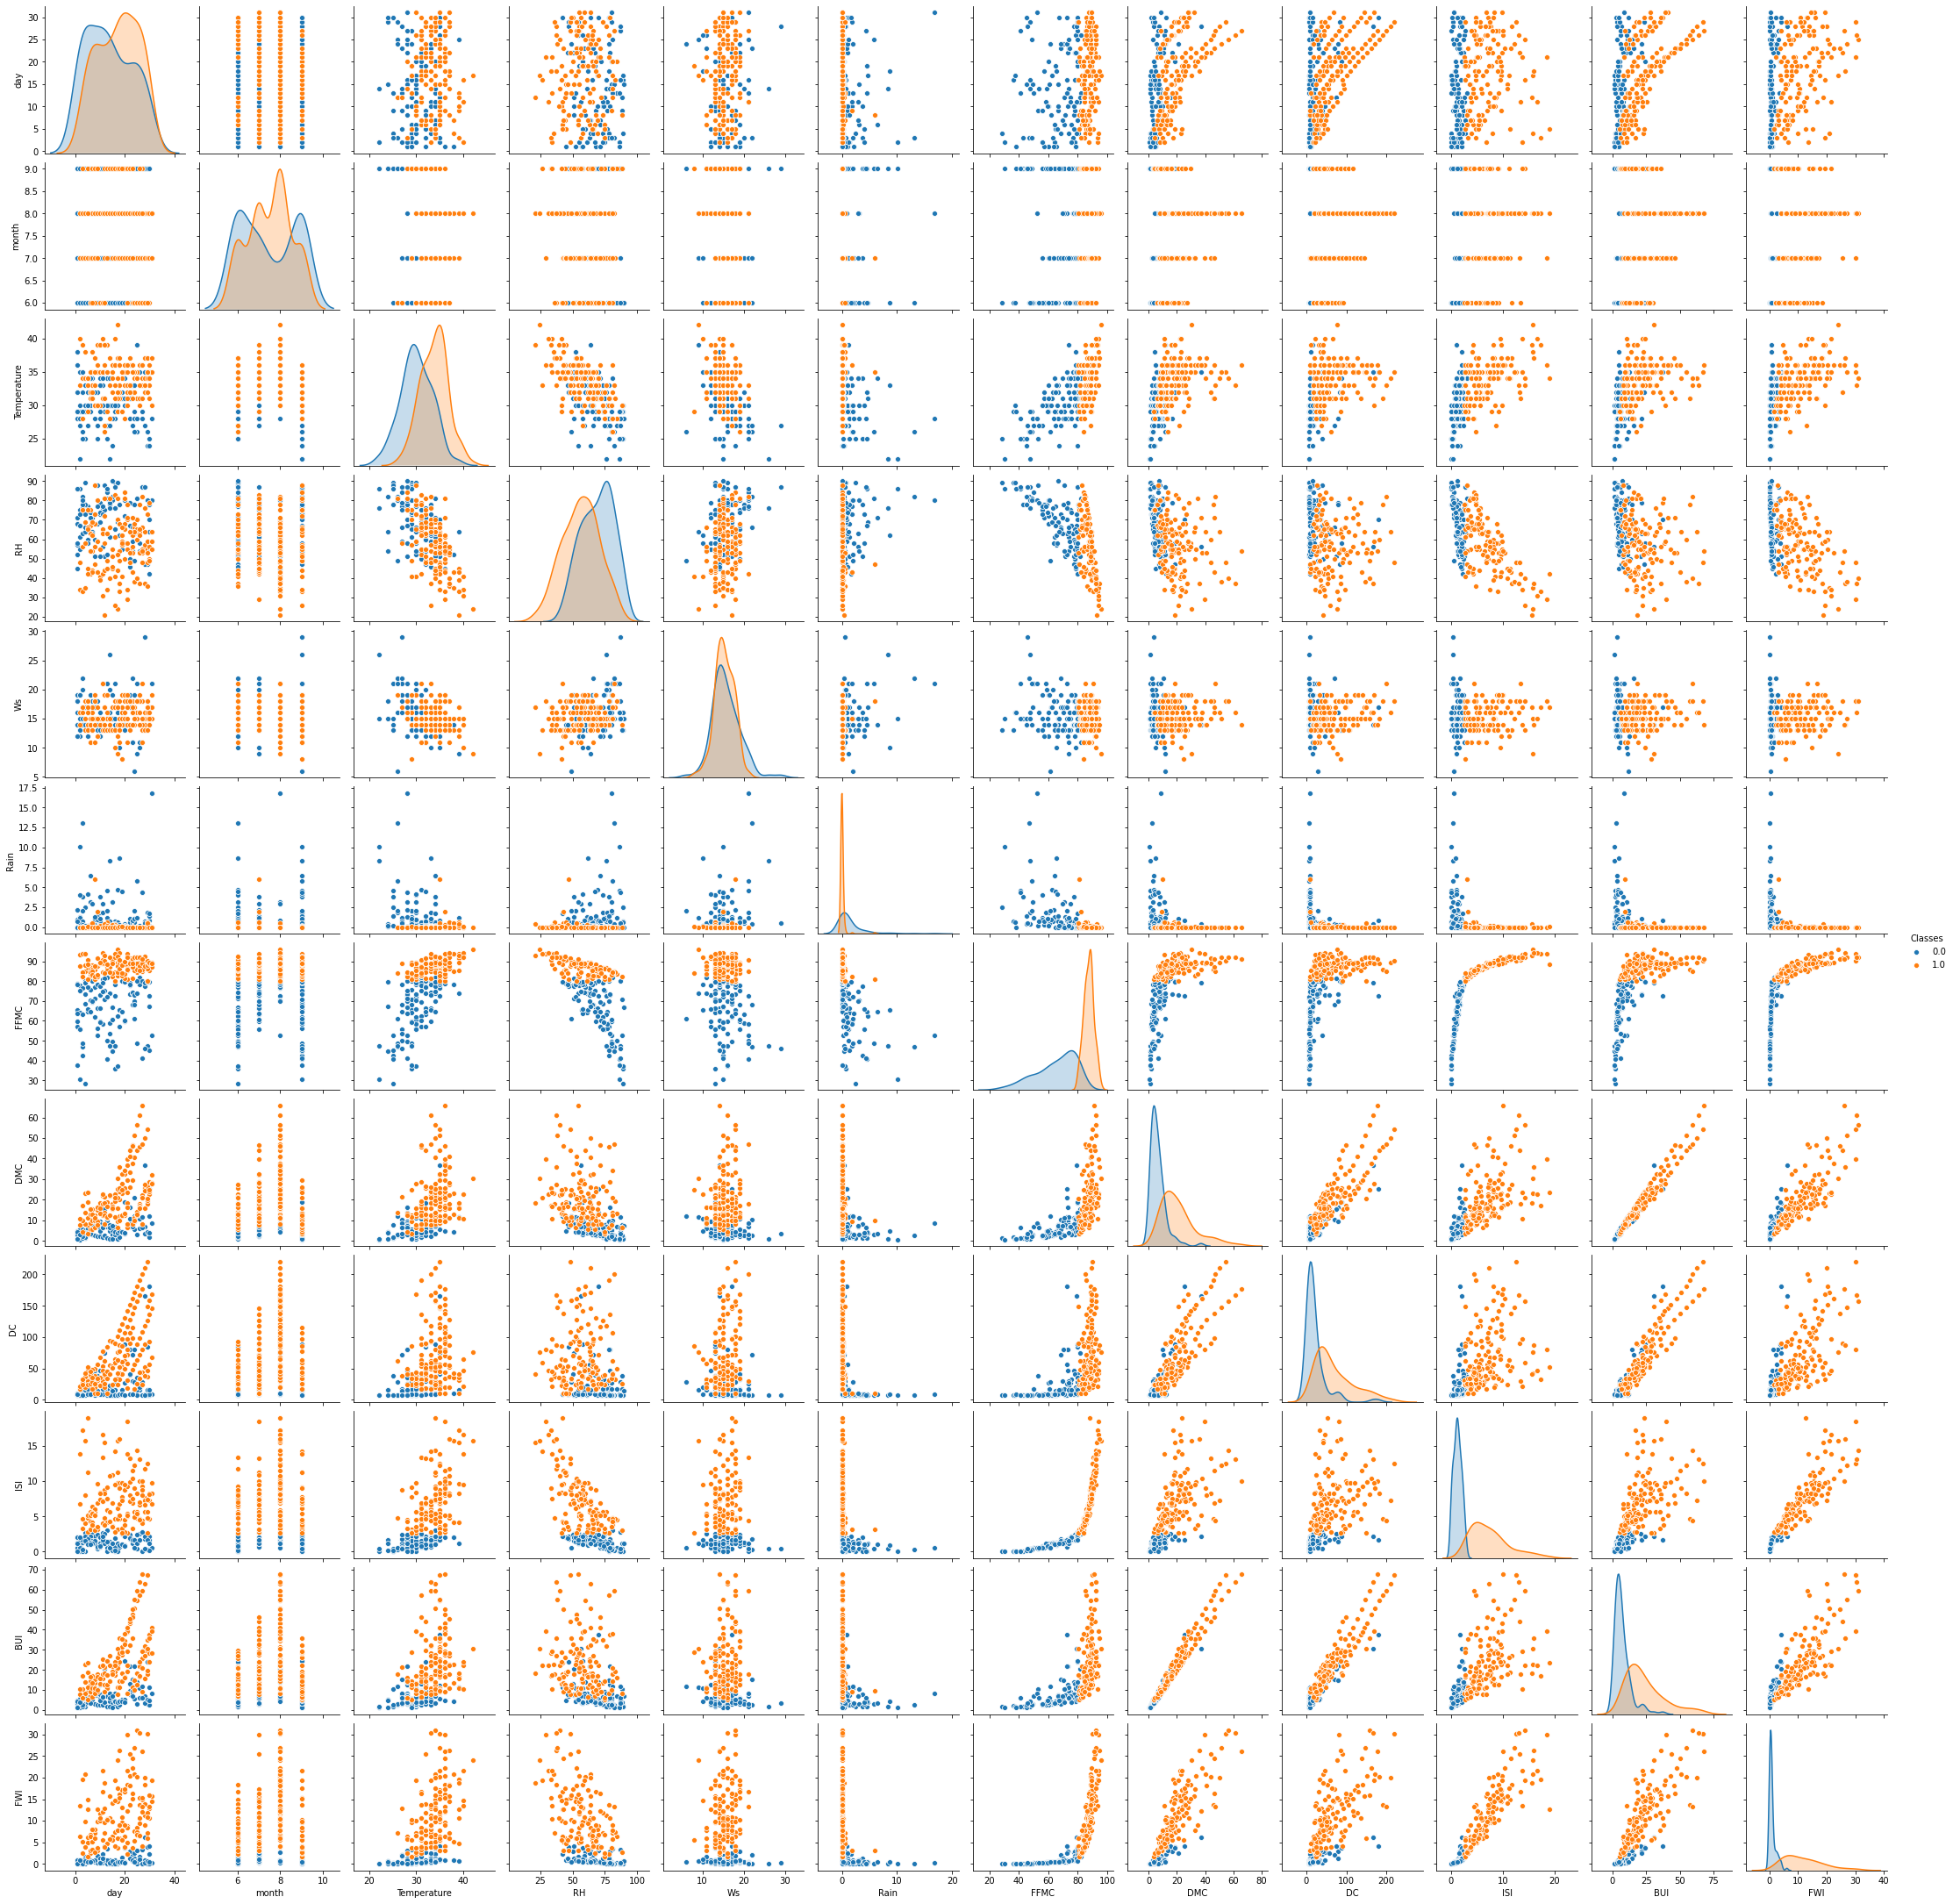

In [33]:
# let's check the pairplot
sns.pairplot(df,hue="Classes")

In [34]:
df.dropna(inplace=True)

In [35]:
# Spliting the data 
X = df.drop("Classes",axis=1)
y = df["Classes"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Let's remove highly correlated columns
#fuction for taking highly correlated columns
def correlation(data,threshold):
    
    col_corr = set()
    corr_matrix = data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) >= threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
                
    return col_corr

In [37]:
correlated_feat = correlation(X_train, 0.85)

In [38]:
# These columns are highly correlated
correlated_feat

{'BUI', 'DC', 'FWI'}

In [39]:
# droping highly correlated column from train and test data
X_train.drop(list(correlated_feat),axis=1,inplace=True)
X_test.drop(list(correlated_feat),axis=1,inplace=True)

C:\Users\Abhishek\Desktop\Project\evn\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 116 to 103
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          193 non-null    float64
 1   month        193 non-null    float64
 2   Temperature  193 non-null    float64
 3   RH           193 non-null    float64
 4   Ws           193 non-null    float64
 5   Rain         193 non-null    float64
 6   FFMC         193 non-null    float64
 7   DMC          193 non-null    float64
 8   ISI          193 non-null    float64
dtypes: float64(9)
memory usage: 15.1 KB


In [41]:
# importing classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
log_model = LogisticRegression(solver="liblinear")
rand_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

In [45]:
log_model.fit(X_train, y_train)
log_model.score(X_test,y_test)

0.9795918367346939

In [46]:
rand_model.fit(X_train,y_train)
rand_model.score(X_test, y_test)

1.0

In [47]:
knn_model.fit(X_train,y_train)
knn_model.score(X_test,y_test)

0.9183673469387755

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
# Randomforest model report
y_preds = rand_model.predict(X_test)
print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        28

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

[[21  0]
 [ 0 28]]


In [50]:
import pickle
pickle.dump(rand_model, open("Algerian_forest.pkl","wb"))

In [51]:
X_train

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
116,25.0,9.0,26.0,81.0,21.0,5.8,48.6,3.0,0.4
210,26.0,8.0,33.0,37.0,16.0,0.0,92.2,61.3,13.1
161,8.0,7.0,35.0,47.0,18.0,6.0,80.8,9.8,3.1
135,12.0,6.0,27.0,58.0,17.0,0.0,88.9,21.3,8.7
84,24.0,8.0,34.0,64.0,14.0,0.0,88.9,40.5,9.0
...,...,...,...,...,...,...,...,...,...
107,16.0,9.0,30.0,65.0,14.0,0.0,78.1,3.2,1.9
14,15.0,6.0,28.0,80.0,17.0,3.1,49.4,3.0,0.4
93,2.0,9.0,22.0,86.0,15.0,10.1,30.5,0.7,0.0
183,30.0,7.0,36.0,56.0,16.0,0.0,88.9,23.8,8.2
